In [20]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib import cm

import ect

from typing import Callable

### Image quota:
 - ECT 1D Kernel with Fourier Kernel (Re, Im) - DONE
 - ECT 2D Kernel with Fourier 2D Kernel (Re, Im)
 - ECT 2D Kernel - offset
 - ECT 1D Example - sine wave
 - ECT 2D Example - sine grating 

In [21]:
KER1_TITLE = "Wykres jądra transformacji 1D ($u = 1$)"
YAXIS_STD = "$K(x, u)$"
XAXIS_STD = "$x$"
XAXIS_CPLX = "$\\mathcal{Re}(K(x, u))$"
YAXIS_CPLX = "$\\mathcal{Im}(K(x, u))$"
# STD_LEGEND 



def display_1Dkernel(x: np.ndarray[float], k: np.ndarray[complex]) -> None:
    
    fig, axd = plt.subplot_mosaic([["std"], ["euler"]], height_ratios=[0.3, 1])
    fig.set_figheight(10)
    fig.set_figwidth(7.5)
    
    ax1: Axes = axd["std"]
    ax1.plot(x, np.real(k))
    ax1.plot(x, np.imag(k))
    ax1.grid(True, "both")
    ax1.set_title(KER1_TITLE)
    ax1.set_xlabel(XAXIS_STD)
    ax1.set_ylabel(YAXIS_STD)
    ax1.set_xlim([x[0], x[-1]])

    ax3: Axes = axd["euler"]
    ax3.plot(np.real(k), np.imag(k))
    ax3.grid(True, "both")
    ax3.set_xlabel(XAXIS_CPLX)
    ax3.set_ylabel(YAXIS_CPLX)




In [22]:
KER2_TITLE = "Wykres jądra transformacji 2D"
DOM_TITLE = "Jądro dla (u = {u}, v = {v})"
TITLE_3D = "Wykres 3d części rzeczywistej jądra"
YAXIS_DOMAIN = "$y$"
XAXIS_DOMAIN = "$x$"
XAXIS_3D = "$x$"
YAXIS_3D = "$y$"
ZAXIS_3D = "$K(x, y, u, v)$"

ker2Dfunc = Callable[[np.ndarray, np.ndarray, float, float], np.ndarray]

def display_2Dkernel(
    x: np.ndarray[float], 
    y: np.ndarray[float],
    ker: ker2Dfunc, 
    uvpairs: list[tuple[float, float]]) -> None:

    fig, axd = plt.subplot_mosaic(
        [["dom1", "dom2", "dom3"],["3dplot", "3dplot", "3dplot"]], 
        width_ratios=[1, 1, 1], 
        height_ratios=[0.5, 1],
        per_subplot_kw={"3dplot":{"projection": "3d"}}
    )

    fig.set_figheight(10)
    fig.set_figwidth(12)
    fig.suptitle(KER2_TITLE)

    xmax: float = x.max().max()
    xmin: float = x.min().min()
    ymax: float = y.max().max()
    ymin: float = y.min().min()

    ticks = lambda dim: [x for x in range(0, kernel.shape[dim]+1, kernel.shape[dim]//4)]

    for i in range(3):
        u, v = uvpairs[i]
        kernel = ker(x, y, u, v)
        ax: Axes = axd[f"dom{i+1}"]

        ax.imshow(ect.complex_to_hsv(kernel))

        ax.set_title(DOM_TITLE.format(u=u, v=v))
        ax.set_xlabel(XAXIS_DOMAIN)
        ax.set_ylabel(YAXIS_DOMAIN)
        ax.set_xticks(
            ticks=ticks(1), 
            labels=[f"{x:.02f}" for x in np.linspace(xmin, xmax, 5)])
        ax.set_yticks(
            ticks=ticks(0), 
            labels=[f"{x:.02f}" for x in np.linspace(ymin, ymax, 5)])

    ax3d: Axes = axd[f"3dplot"]
    s = ax3d.plot_surface(x, y, np.real(kernel), 
        cmap = cm.coolwarm,
        linewidth = 0)
        # antialiased = True)
    
    ax3d.set_xlabel(XAXIS_3D)
    ax3d.set_ylabel(YAXIS_3D)
    ax3d.set_zlabel(ZAXIS_3D)
    ax3d.set_xticks(
        ticks=np.linspace(xmin, xmax, 5), 
        labels=[f"{x:.02f}" for x in np.linspace(xmin, xmax, 5)])
    ax3d.set_yticks(
        ticks=np.linspace(ymin, ymax, 5), 
        labels=[f"{x:.02f}" for x in np.linspace(ymin, ymax, 5)])

    ax3d.set_title(TITLE_3D)

    # fig.colorbar(s, shrink=0.5, aspect=5)


### Fourier Kernel

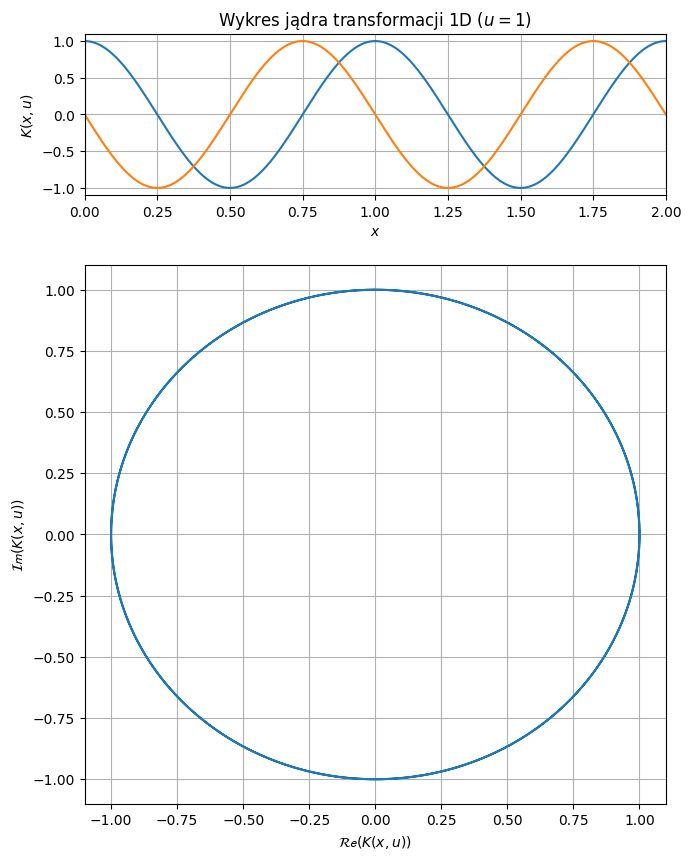

In [23]:
def fourier1Dkernel(x: np.ndarray, u: float) -> np.ndarray:
    return np.exp(-2*np.pi*x*u*(0+1j))

x = np.linspace(0, 2, 1000)
ker = fourier1Dkernel(x, 1)

display_1Dkernel(x, ker)


### ECT 1D Kernel

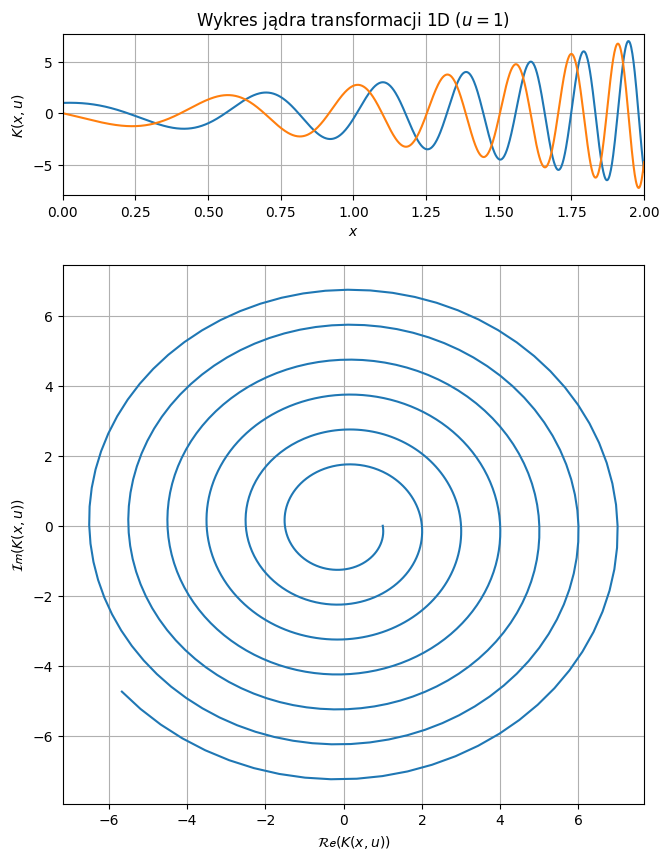

In [24]:
def ect1Dkernel(x: np.ndarray, u: float) -> np.ndarray:
    return np.exp(-2*np.pi*np.exp(x)*u*(0+1j))*np.exp(x)

x = np.linspace(0, 2, 1000)
ker = ect1Dkernel(x, 1)

display_1Dkernel(x, ker)


### Fourier 2D Kernel

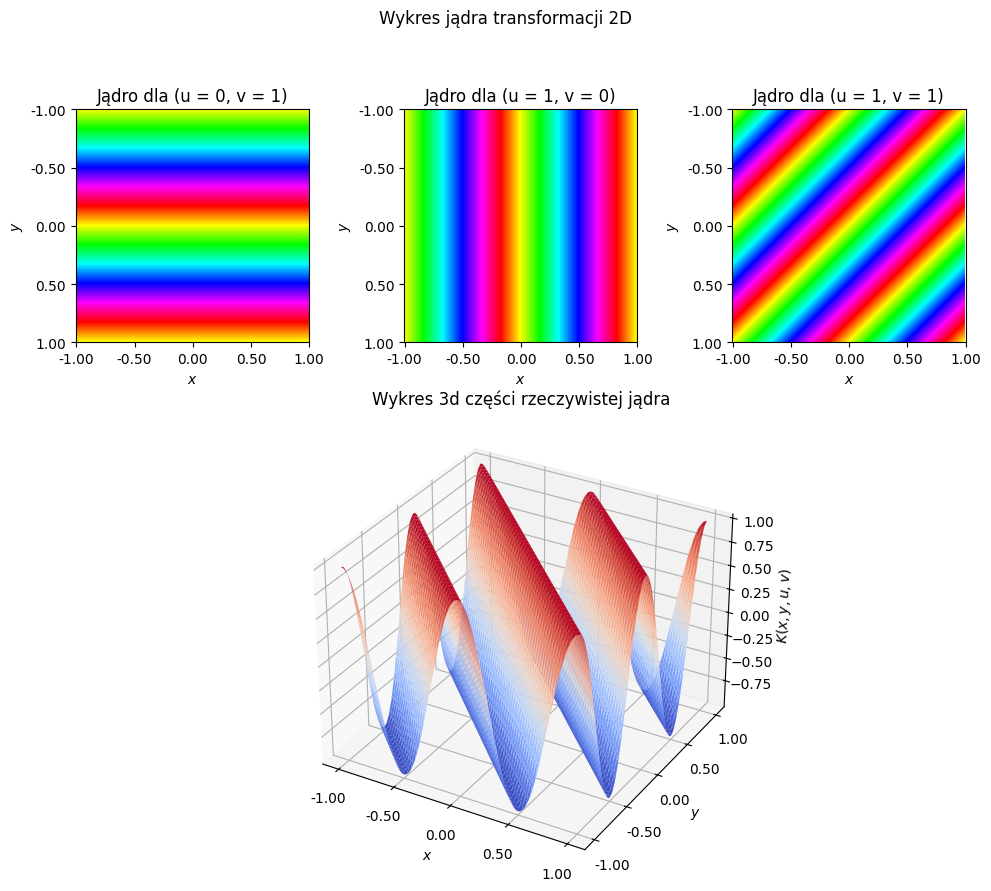

In [25]:
def fourier2Dkernel(x, y: np.ndarray, u, v: float):
    return np.exp(-2*np.pi*(0+1j)*(x*u + v*y))

x = np.linspace(-1, 1, 300)
y = np.linspace(-1, 1, 300)
xx, yy = np.meshgrid(x, y)

uv = [(0, 1), (1, 0), (1, 1)]

display_2Dkernel(xx, yy, fourier2Dkernel, uv)

### ECT 2D Kernel - classic

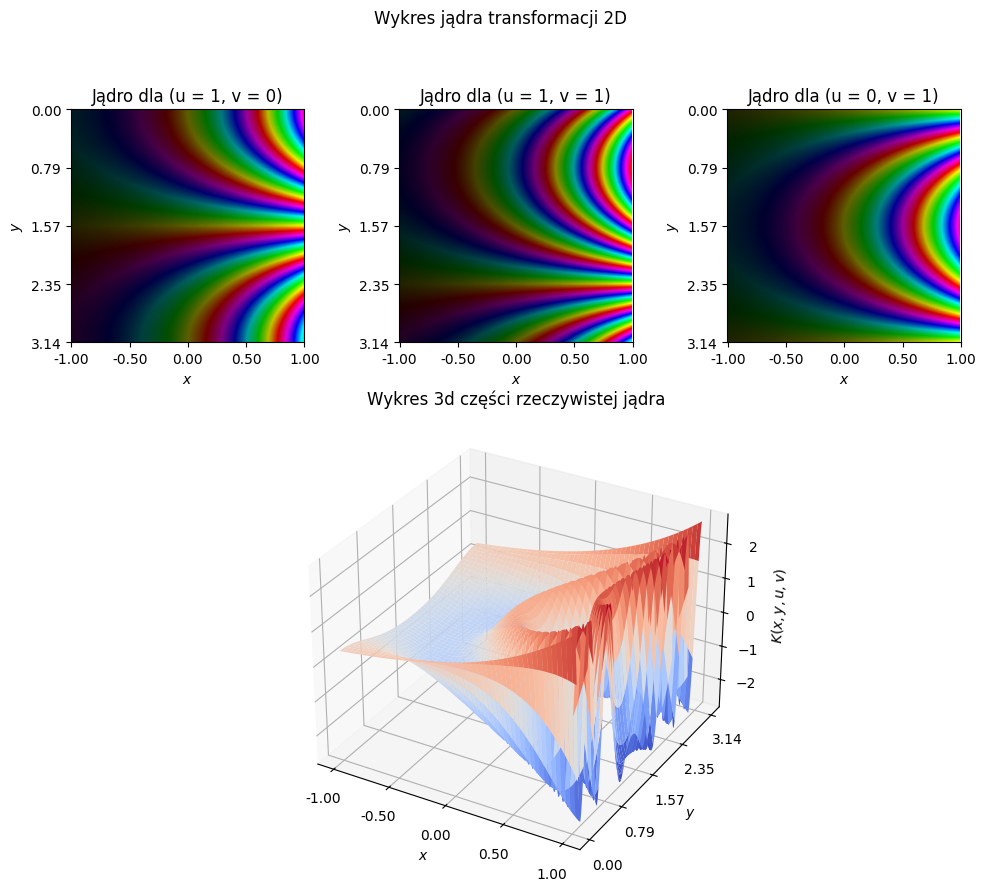

In [26]:
def ect2Dkernel(x, y: np.ndarray, u, v: float):
    return np.exp(x-2*np.pi*(0+1j)*np.exp(x)*(u*np.cos(y) + v*np.sin(y)))

x = np.linspace(-1, 1, 300)
y = np.linspace(0, 3.14, 300)
xx, yy = np.meshgrid(x, y)

uv = [(1, 0), (1, 1), (0, 1)]

display_2Dkernel(xx, yy, ect2Dkernel, uv)

### ECT 2D Kernel - offset

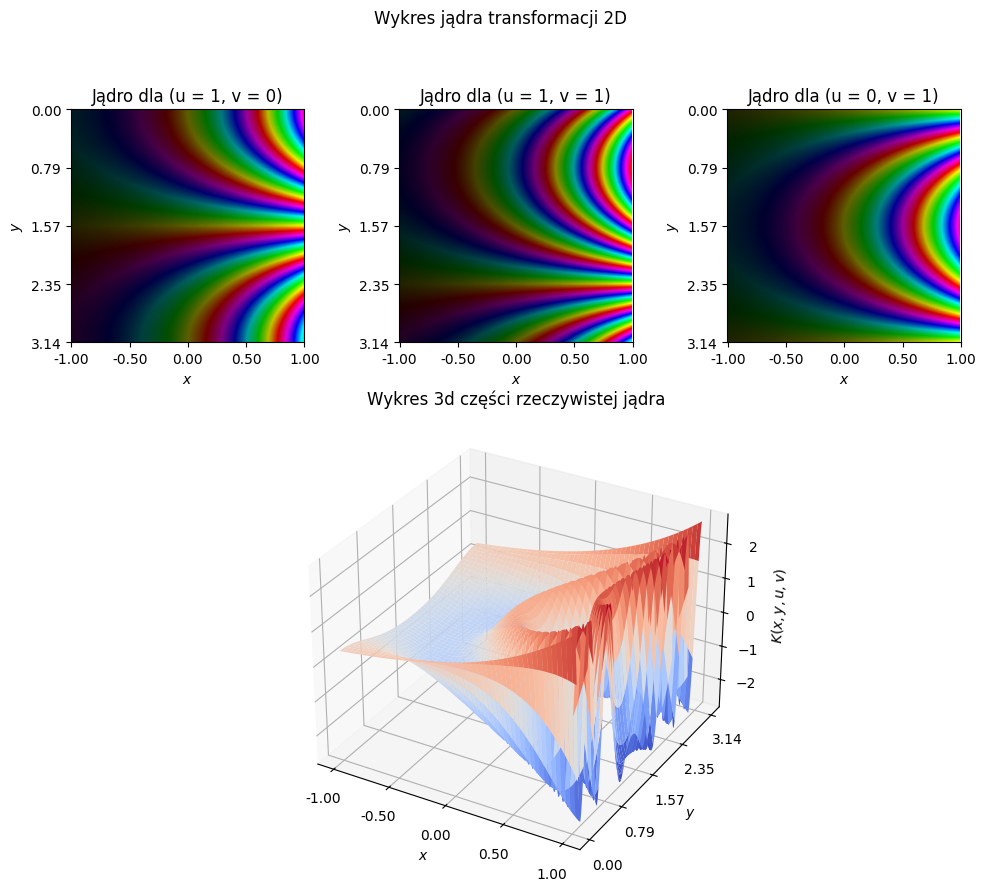

In [27]:
def ect2Dkerneloff(x, y: np.ndarray, u, v: float):
    return np.exp(x-2*np.pi*(0+1j)*np.exp(x)*(u*np.cos(y) + v*np.sin(y)))

x = np.linspace(-1, 1, 300)
y = np.linspace(0, 3.14, 300)
xx, yy = np.meshgrid(x, y)

uv = [(1, 0), (1, 1), (0, 1)]

display_2Dkernel(xx, yy, ect2Dkerneloff, uv)

### ECT 2D Kernel - irregular sampling

$$
K(\gamma, \theta, \rho, \varphi) = 
    e^{
        \rho - 2 \pi i b e^\rho \cos{\varphi}
    }
    e^{
        - 2 \pi i e^{\rho + \gamma} \cos(\theta + \varphi)
    }
$$

In [42]:
KER2_TITLE = "Wykres jądra transformacji 2D"
DOM_TITLE = "Jądro dla ($\\gamma$ = {u}, $\\theta$ = {v:.2f})"
TITLE_3D = "Wykres 3d części rzeczywistej jądra"
YAXIS_DOMAIN = "$\\phi$"
XAXIS_DOMAIN = "$\\rho$"
XAXIS_3D = "$\\rho$"
YAXIS_3D = "$\\phi$"
ZAXIS_3D = "$K(x, y, u, v)$"

ker2Dfunc = Callable[[np.ndarray, np.ndarray, float, float], np.ndarray]

def display_2Dkernel_lpsample(
    x: np.ndarray[float], 
    y: np.ndarray[float],
    ker: ker2Dfunc, 
    uvpairs: list[tuple[float, float]]) -> None:

    fig, axd = plt.subplot_mosaic(
        [["dom1", "dom2", "dom3"],["3dplot", "3dplot", "3dplot"]], 
        width_ratios=[1, 1, 1], 
        height_ratios=[0.5, 1],
        per_subplot_kw={"3dplot":{"projection": "3d"}}
    )

    fig.set_figheight(10)
    fig.set_figwidth(12)
    fig.suptitle(KER2_TITLE)

    xmax: float = x.max().max()
    xmin: float = x.min().min()
    ymax: float = y.max().max()
    ymin: float = y.min().min()

    ticks = lambda dim: [x for x in range(0, kernel.shape[dim]+1, kernel.shape[dim]//4)]

    for i in range(3):
        u, v = uvpairs[i]
        kernel = ker(x, y, u, v)
        ax: Axes = axd[f"dom{i+1}"]

        ax.imshow(ect.complex_to_hsv(kernel))

        ax.set_title(DOM_TITLE.format(u=u, v=v))
        ax.set_xlabel(XAXIS_DOMAIN)
        ax.set_ylabel(YAXIS_DOMAIN)
        ax.set_xticks(
            ticks=ticks(1), 
            labels=[f"{x:.02f}" for x in np.linspace(xmin, xmax, 5)])
        ax.set_yticks(
            ticks=ticks(0), 
            labels=[f"{x:.02f}" for x in np.linspace(ymin, ymax, 5)])

    ax3d: Axes = axd[f"3dplot"]
    s = ax3d.plot_surface(x, y, np.real(kernel), 
        cmap = cm.coolwarm,
        linewidth = 0)
        # antialiased = True)
    
    ax3d.set_xlabel(XAXIS_3D)
    ax3d.set_ylabel(YAXIS_3D)
    ax3d.set_zlabel(ZAXIS_3D)
    ax3d.set_xticks(
        ticks=np.linspace(xmin, xmax, 5), 
        labels=[f"{x:.02f}" for x in np.linspace(xmin, xmax, 5)])
    ax3d.set_yticks(
        ticks=np.linspace(ymin, ymax, 5), 
        labels=[f"{x:.02f}" for x in np.linspace(ymin, ymax, 5)])

    ax3d.set_title(TITLE_3D)

    # fig.colorbar(s, shrink=0.5, aspect=5)

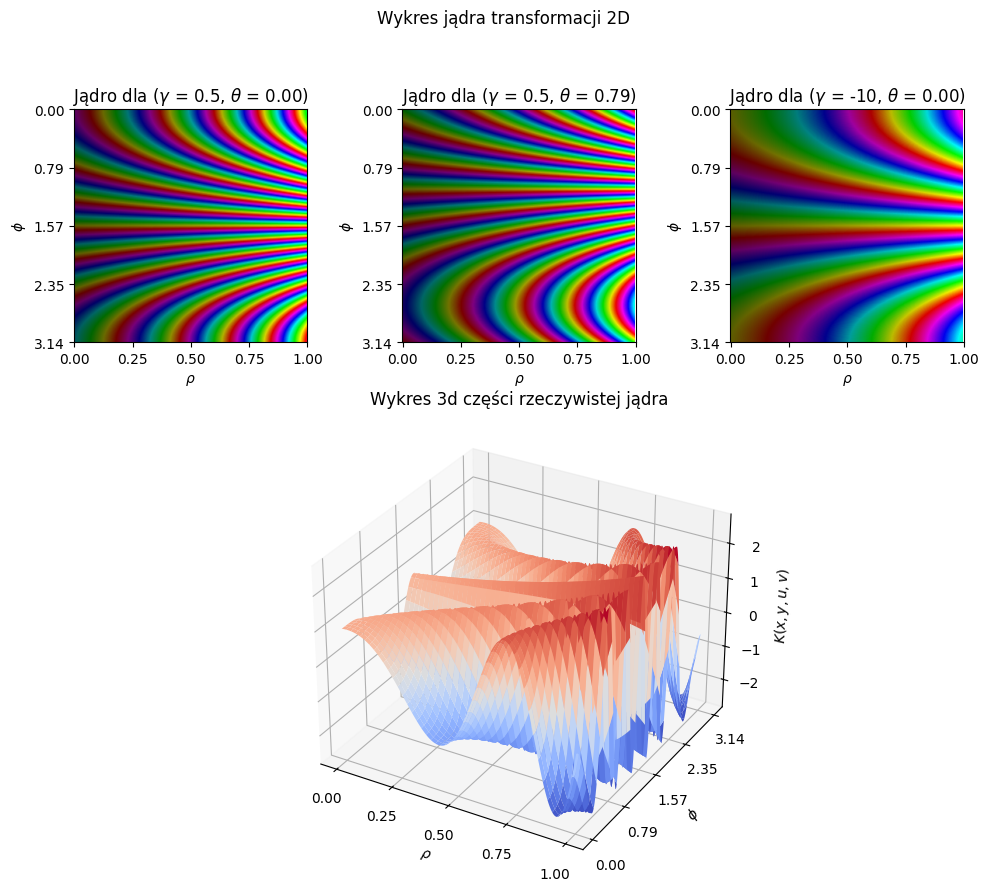

In [44]:
def ect2Dkerneloff(rho, phi: np.ndarray, gamma, theta: float):
    return np.exp(rho - 2*np.pi*1j*np.exp(rho)*np.cos(phi)) * np.exp(-2*np.pi*1j*np.exp(rho+gamma)*np.cos(phi+theta))

x = np.linspace(0, 1, 300)
y = np.linspace(0, 3.14, 300)
xx, yy = np.meshgrid(x, y)

uv = [(.5, 0), (.5, np.pi/4), (-10, 0)]

display_2Dkernel(xx, yy, ect2Dkerneloff, uv)

### Shift term

In [46]:
SH_TITLE = "Wykres czynnika przesunięcia dla (a = {a})"
YAXIS_DOMAIN = "$v$"
XAXIS_DOMAIN = "$u$"
XAXIS_3D = "$u$"
YAXIS_3D = "$v$"
ZAXIS_3D = "$S(u, v)$"

shift2Dfunc = Callable[[np.ndarray, np.ndarray, float], np.ndarray]

def display_shift(
    x: np.ndarray[float], 
    y: np.ndarray[float],
    sh: shift2Dfunc,
    offsets: list[float]
) -> None:

    fig, axd = plt.subplot_mosaic(
        [["dom1", "3dplot"]], 
        width_ratios=[1, 1], 
        height_ratios=[1],
        per_subplot_kw={"3dplot":{"projection": "3d"}}
    )

    fig.set_figheight(6)
    fig.set_figwidth(12)
    fig.suptitle(SH_TITLE.format(a=offsets[0]))

    xmax: float = x.max().max()
    xmin: float = x.min().min()
    ymax: float = y.max().max()
    ymin: float = y.min().min()

    ticks = lambda dim: [x for x in range(0, x.shape[dim]+1, x.shape[dim]//4)]

    for i in range(1):
        off = offsets[i]
        shift = sh(x, y, off)
        ax: Axes = axd[f"dom{i+1}"]

        ax.imshow(ect.complex_to_hsv(shift))

        # ax.set_title(DOM_TITLE.format(a=off))
        ax.set_xlabel(XAXIS_DOMAIN)
        ax.set_ylabel(YAXIS_DOMAIN)
        ax.set_xticks(
            ticks=ticks(1), 
            labels=[f"{x:.02f}" for x in np.linspace(xmin, xmax, 5)])
        ax.set_yticks(
            ticks=ticks(0), 
            labels=[f"{x:.02f}" for x in np.linspace(ymin, ymax, 5)])

    ax3d: Axes = axd[f"3dplot"]
    s = ax3d.plot_surface(x, y, np.real(shift), 
        cmap = cm.coolwarm,
        linewidth = 0,
        antialiased = True)
    
    ax3d.set_xlabel(XAXIS_3D)
    ax3d.set_ylabel(YAXIS_3D)
    ax3d.set_zlabel(ZAXIS_3D)
    ax3d.set_xticks(
        ticks=np.linspace(xmin, xmax, 5), 
        labels=[f"{x:.02f}" for x in np.linspace(xmin, xmax, 5)])
    ax3d.set_yticks(
        ticks=np.linspace(ymin, ymax, 5), 
        labels=[f"{x:.02f}" for x in np.linspace(ymin, ymax, 5)])

    # ax3d.set_title(TITLE_3D)

    # fig.colorbar(s, shrink=0.5, aspect=5)

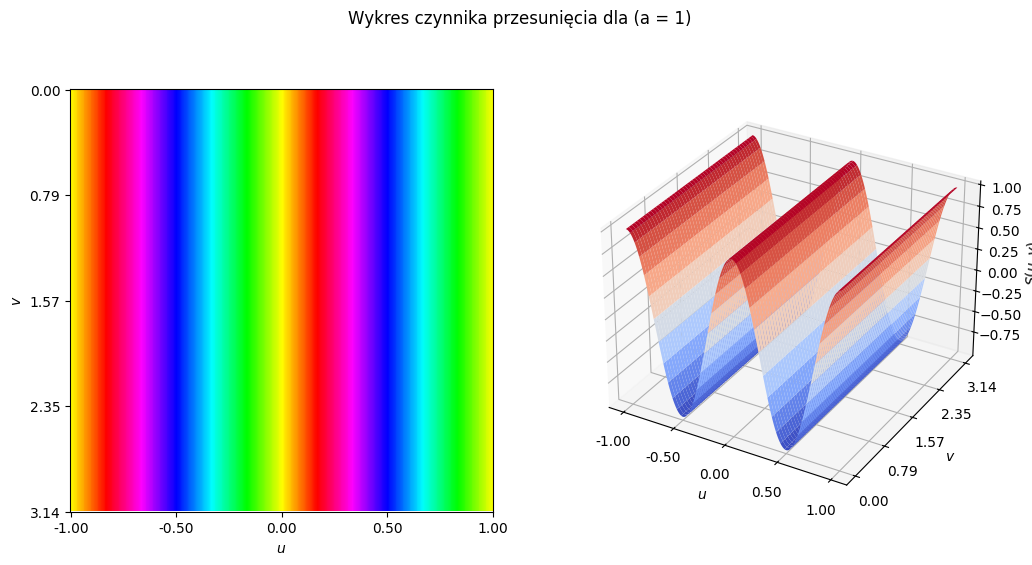

In [47]:
def shiftect(u, v: np.ndarray, a: float):
    return np.exp(2*np.pi*(0+1j)*u*a)

x = np.linspace(-1, 1, 300)
y = np.linspace(0, 3.14, 300)
xx, yy = np.meshgrid(x, y)

uv = [(1, 0), (1, 1), (0, 1)]

display_shift(xx, yy, shiftect, [1, 0, 1])

### Czynnik przecunięcia FECT

$$
S(\gamma, \theta) = 
    e^{
        \mp 2 \pi i a (
            e^\gamma \cos{\theta} \pm b
        )    
    }
$$

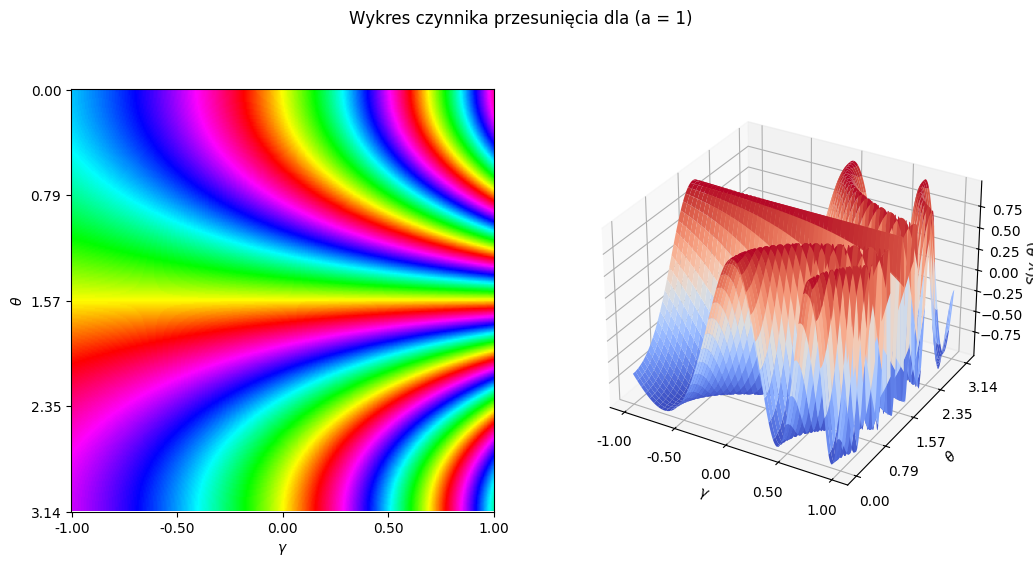

In [48]:
SH_TITLE = "Wykres czynnika przesunięcia dla (a = {a})"
YAXIS_DOMAIN = "$\\theta$"
XAXIS_DOMAIN = "$\\gamma$"
XAXIS_3D = "$\\gamma$"
YAXIS_3D = "$\\theta$"
ZAXIS_3D = "$S(\\gamma, \\theta)$"

def shiftfect(gamma, theta: np.ndarray, a: float):
    return np.exp(-2*np.pi*(0+1j)*(np.exp(gamma)*np.cos(theta) + a)*a)

x = np.linspace(-1, 1, 300)
y = np.linspace(0, 3.14, 300)
xx, yy = np.meshgrid(x, y)

uv = [(1, 0), (1, 1), (0, 1)]

display_shift(xx, yy, shiftfect, [1, 0, 1])

### ECT 1D Example - sine wave

### ECT 2D Example - sine grating